In [1]:
# 1. Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import kagglehub
import os
import time

# Set visualization style
sns.set_style("darkgrid")
sns.set_palette("muted")
print("Dependencies imported successfully.")

Dependencies imported successfully.


In [2]:
# 2. Importing Dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
csv_file = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_file)

print("\nDataset Overview:")
print(f"Shape: {df.shape}")

100%|██████████| 66.0M/66.0M [00:00<00:00, 127MB/s]

Extracting files...



Dataset Overview:
Shape: (284807, 31)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]>

In [9]:
# 3. Data Cleaning
print("\n=== Data Cleaning ===")
print("Missing Values:\n", df.isnull().sum())
df = df.drop_duplicates()
print(f"Duplicates removed. New Shape: {df.shape}")
print("Data Cleaning Completed.......................")


=== Data Cleaning ===
Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates removed. New Shape: (283726, 31)
Data Cleaning Completed.......................


In [10]:
# 4. Data Processing
print("\n=== Data Processing ===")

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']
print("Features and target separated.")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train-Test Split: 80% train, 20% test.")

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features scaled using StandardScaler.")
print("Data Preprocessing is Completed....................")


=== Data Processing ===
Features and target separated.
Train-Test Split: 80% train, 20% test.
Features scaled using StandardScaler.
Data Preprocessing is Completed....................


In [12]:

# 5. Model Building
# Define models with minimal, fast settings
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=50, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight, n_jobs=-1),
    'LightGBM': LGBMClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1)
}

print("\n=== Model Building ===")
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    exec_time = time.time() - start_time
    results[name] = {'model': model, 'accuracy': accuracy, 'y_pred': y_pred, 'time': exec_time}

# Optimize LightGBM with minimal, fast grid
print("\n=== LightGBM Optimization ===")
param_grid_lgbm = {
    'n_estimators': [100, 200],      # Minimal options
    'max_depth': [5, 7],             # Reduced depths
    'learning_rate': [0.05]          # Fixed for speed
}
lgbm = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
start_time = time.time()
grid_search_lgbm.fit(X_train, y_train)
lgbm_time = time.time() - start_time
best_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)


=== Model Building ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== LightGBM Optimization ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
# 6. Model Evaluation
print("\n=== Model Evaluation ===")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {result['accuracy']:.4f} | Time: {result['time']:.2f}s")
    print("Classification Report:\n", classification_report(y_test, result['y_pred'], zero_division=0))

print("\nOptimized LightGBM:")
print(f"Best Parameters: {grid_search_lgbm.best_params_}")
print(f"Accuracy: {lgbm_accuracy:.4f} | Time (Grid Search): {lgbm_time:.2f}s")
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm, zero_division=0))


=== Model Evaluation ===

Random Forest:
Accuracy: 0.9995 | Time: 106.36s
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746


XGBoost:
Accuracy: 0.9995 | Time: 4.60s
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746


LightGBM:
Accuracy: 0.9984 | Time: 3.09s
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
       


=== Visualizations ===


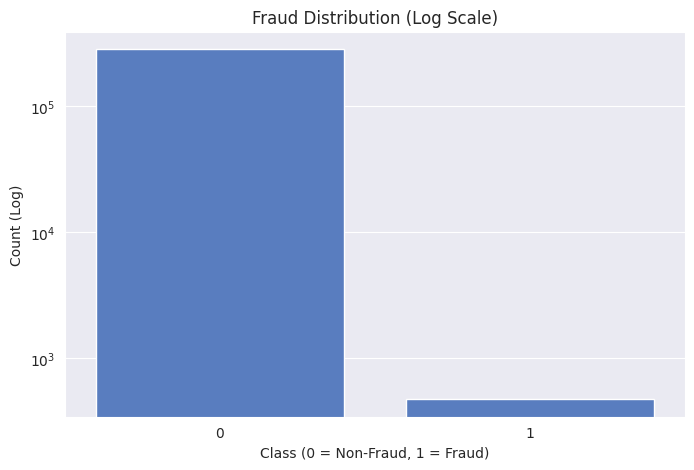

In [14]:
# 7. Visualizations
print("\n=== Visualizations ===")

# Fraud Distribution (log scale for visibility)
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title('Fraud Distribution (Log Scale)')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count (Log)')
plt.show()

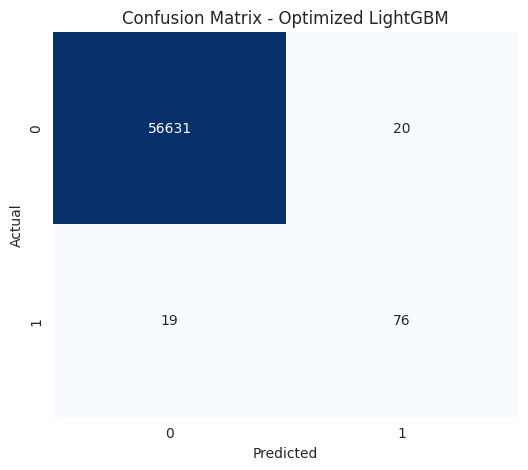

In [15]:
# Confusion Matrix (Optimized LightGBM)
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Optimized LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


=== ROC Curve ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


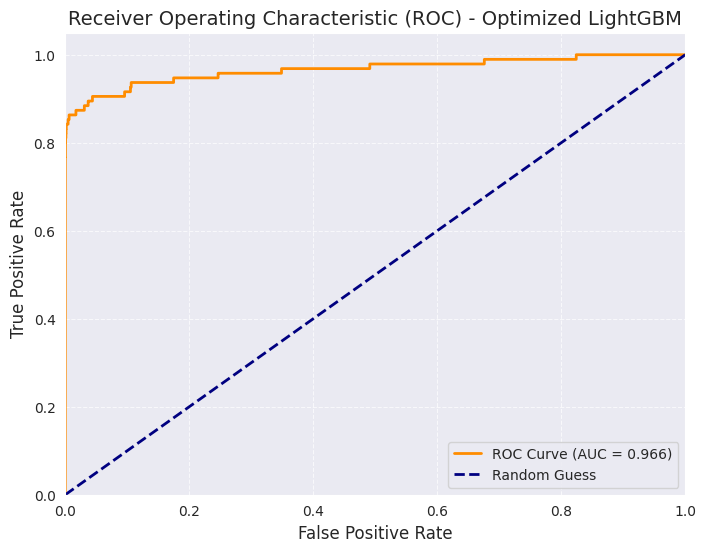

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve for Optimized LightGBM
print("\n=== ROC Curve ===")
y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]  # Compute probabilities here
fpr, tpr, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) - Optimized LightGBM', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


=== Precision-Recall Curve ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


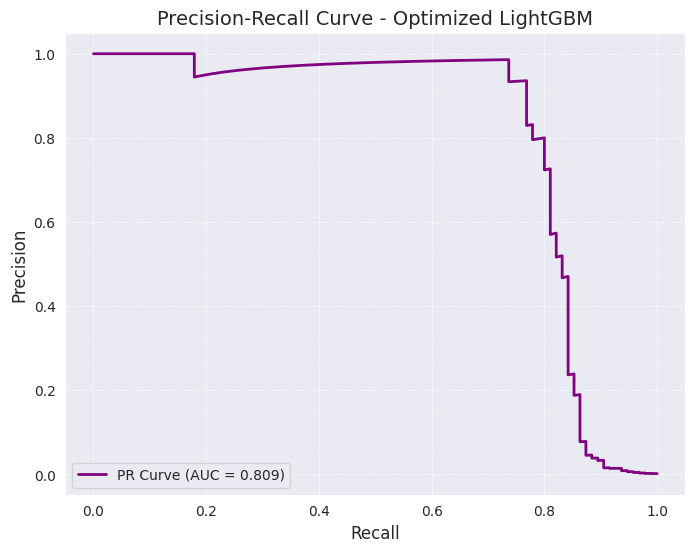

In [25]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Precision-Recall Curve for Optimized LightGBM
print("\n=== Precision-Recall Curve ===")
y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]  # Compute probabilities here
precision, recall, _ = precision_recall_curve(y_test, y_prob_lgbm)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Optimized LightGBM', fontsize=14)
plt.legend(loc="lower left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


=== Feature Importance ===


<ipython-input-26-33e48ae3d9c2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


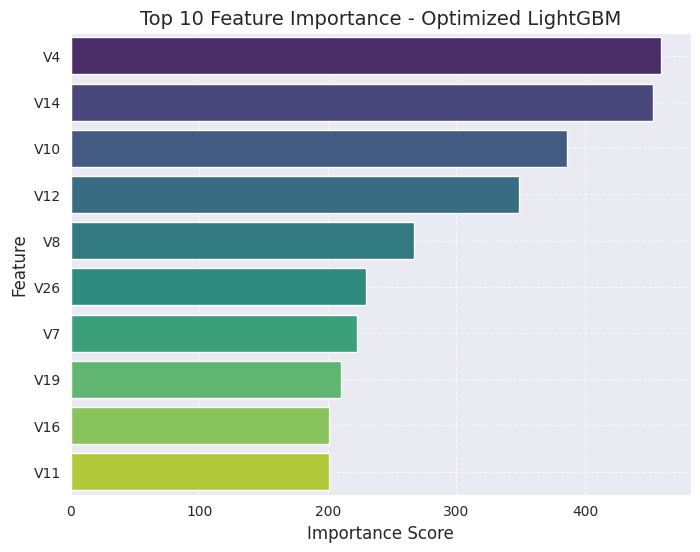

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Importance for Optimized LightGBM
print("\n=== Feature Importance ===")
feature_importance = pd.Series(best_lgbm.feature_importances_, index=X.columns)
top_10 = feature_importance.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Feature Importance - Optimized LightGBM', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


=== Model Accuracy Comparison ===


<ipython-input-27-99252185e9d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='coolwarm')


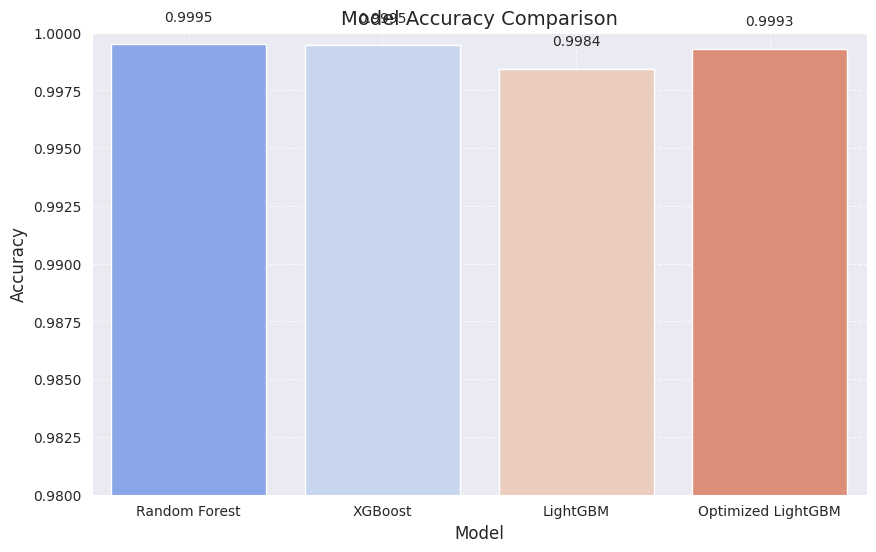

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Model Accuracy Comparison
print("\n=== Model Accuracy Comparison ===")
model_names = list(results.keys()) + ['Optimized LightGBM']
accuracies = [results[name]['accuracy'] for name in results] + [lgbm_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='coolwarm')
plt.ylim(0.98, 1.0)  # Zoomed for clarity
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [17]:
# 8. Accuracy Summary
print("\n=== Accuracy Summary ===")
print(f"{'Model':<20} {'Accuracy':<10} {'Time (s)':<10}")
print("-" * 40)
for name, result in results.items():
    print(f"{name:<20} {result['accuracy']:.4f}     {result['time']:.2f}")
print(f"{'Optimized LightGBM':<20} {lgbm_accuracy:.4f}     {lgbm_time:.2f}")

best_accuracy = max(lgbm_accuracy, max(r['accuracy'] for r in results.values()))
best_name = 'LightGBM' if lgbm_accuracy == best_accuracy else next(n for n, r in results.items() if r['accuracy'] == best_accuracy)


=== Accuracy Summary ===
Model                Accuracy   Time (s)  
----------------------------------------
Random Forest        0.9995     106.36
XGBoost              0.9995     4.60
LightGBM             0.9984     3.09
Optimized LightGBM   0.9993     225.05
